In [3]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [5]:
# Fetch historical stock data
ticker = 'AAPL'
stock_data = yf.download(ticker, start='2020-01-01', end='2024-01-01')

# Display the first few rows of the dataset
print(stock_data.head())


[*********************100%***********************]  1 of 1 completed

Price       Adj Close      Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                                        
2020-01-02  72.796021  75.087502  75.150002  73.797501  74.059998  135480400
2020-01-03  72.088295  74.357498  75.144997  74.125000  74.287498  146322800
2020-01-06  72.662704  74.949997  74.989998  73.187500  73.447502  118387200
2020-01-07  72.320984  74.597504  75.224998  74.370003  74.959999  108872000
2020-01-08  73.484344  75.797501  76.110001  74.290001  74.290001  132079200


In [6]:
# Summary statistics
print(stock_data.describe())

# Check for missing values
print(stock_data.isnull().sum())


Price     Adj Close        Close         High          Low         Open  \
Ticker         AAPL         AAPL         AAPL         AAPL         AAPL   
count   1006.000000  1006.000000  1006.000000  1006.000000  1006.000000   
mean     138.711616   140.808131   142.321389   139.143536   140.675507   
std       33.540054    33.313857    33.430571    33.179199    33.310018   
min       54.509762    56.092499    57.125000    53.152500    57.020000   
25%      121.054718   123.592501   125.030003   122.157499   123.682503   
50%      143.596558   145.860001   147.264999   144.120003   145.540001   
75%      164.086544   166.214996   168.147503   164.815002   166.302498   
max      197.144180   198.110001   199.619995   197.000000   198.020004   

Price         Volume  
Ticker          AAPL  
count   1.006000e+03  
mean    9.895211e+07  
std     5.439653e+07  
min     2.404830e+07  
25%     6.407675e+07  
50%     8.467540e+07  
75%     1.155069e+08  
max     4.265100e+08  
Price      Ticker
A

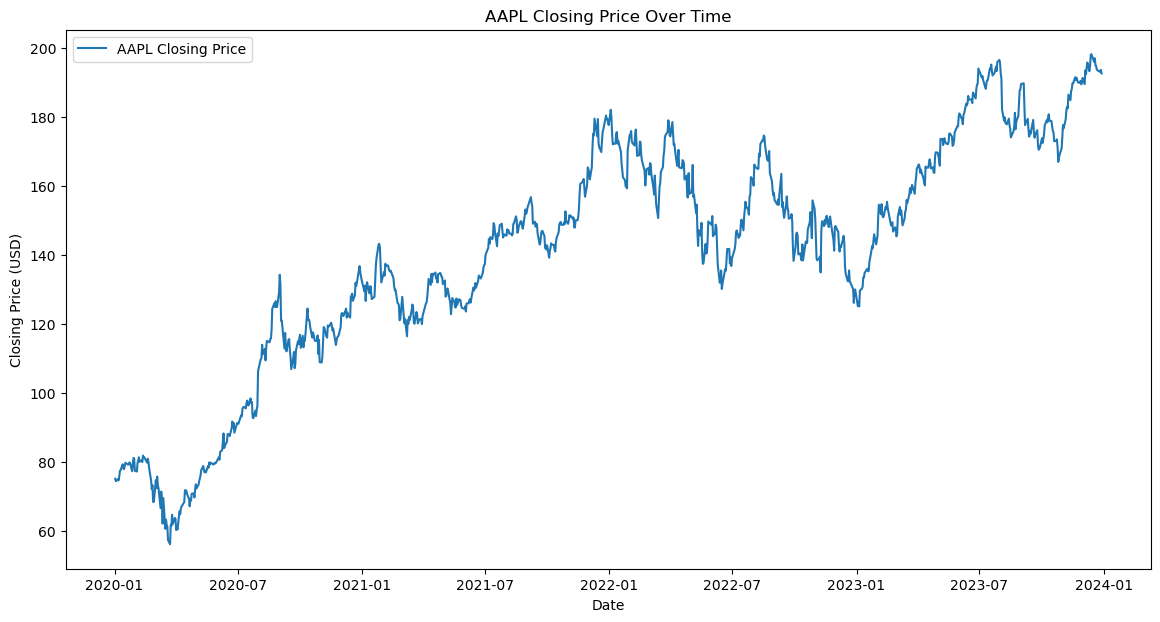

In [7]:
# Plot the closing price over time
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Close'], label='AAPL Closing Price')
plt.title('AAPL Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()


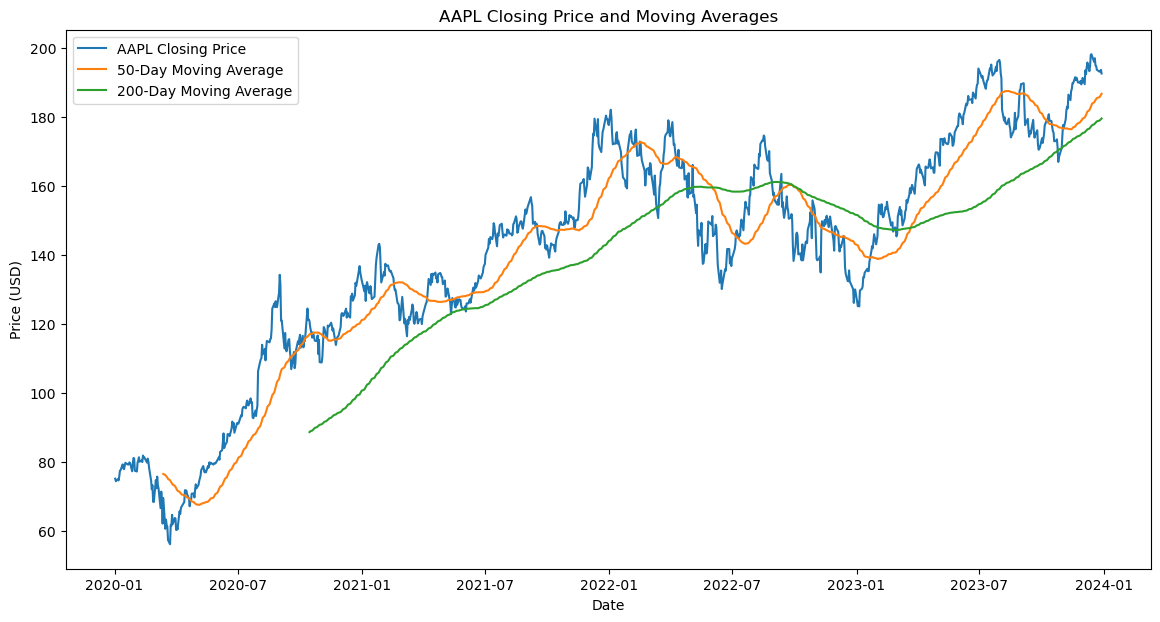

In [8]:
# Calculate moving averages
stock_data['MA50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['MA200'] = stock_data['Close'].rolling(window=200).mean()

# Plot moving averages
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Close'], label='AAPL Closing Price')
plt.plot(stock_data['MA50'], label='50-Day Moving Average')
plt.plot(stock_data['MA200'], label='200-Day Moving Average')
plt.title('AAPL Closing Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


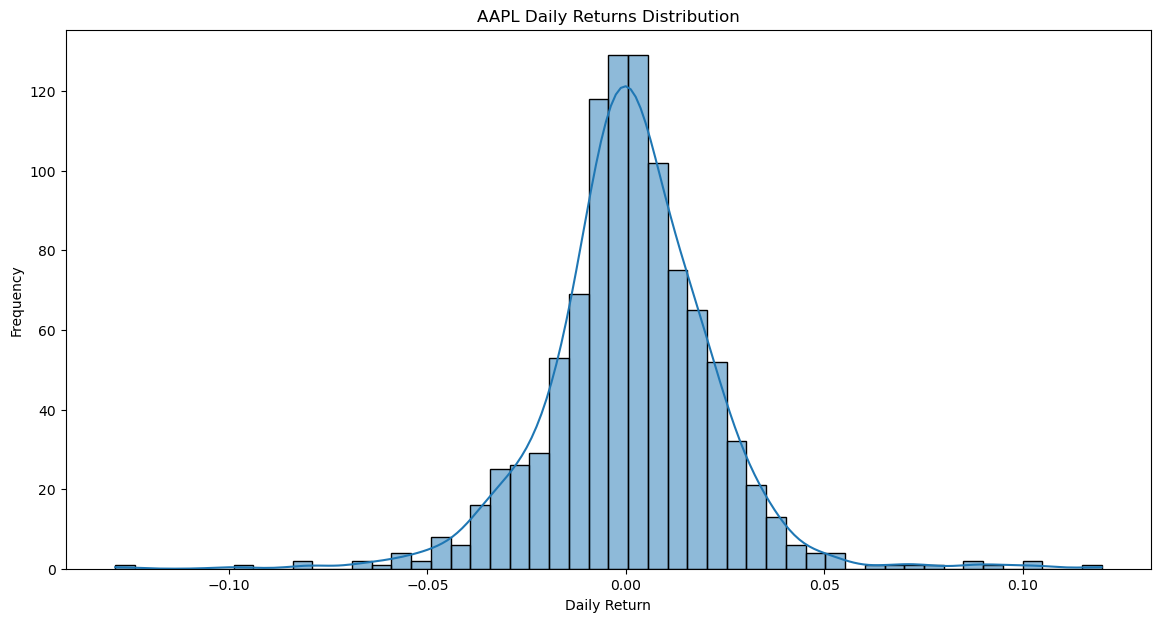

In [9]:
# Calculate daily returns
stock_data['Daily Return'] = stock_data['Close'].pct_change()

# Plot daily returns
plt.figure(figsize=(14, 7))
sns.histplot(stock_data['Daily Return'].dropna(), bins=50, kde=True)
plt.title('AAPL Daily Returns Distribution')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()


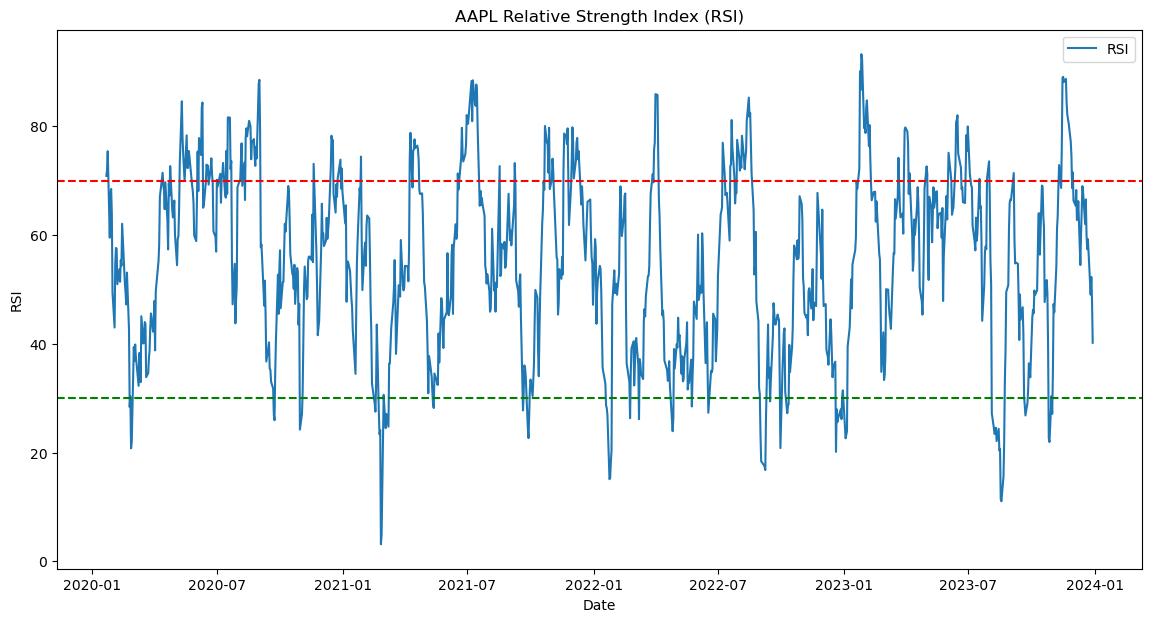

In [10]:
# Calculate RSI
def calculate_rsi(data, window):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

stock_data['RSI'] = calculate_rsi(stock_data, window=14)

# Plot RSI
plt.figure(figsize=(14, 7))
plt.plot(stock_data['RSI'], label='RSI')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('AAPL Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()
